In [1]:
import numpy as np
import nibabel as nib

import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Load gradient niftis
G1 = nib.load('/home/ROBARTS/schakraborty/Downloads/Func_Schaefer_gradient_0.nii.gz').get_fdata()
G2 = nib.load('/home/ROBARTS/schakraborty/Downloads/Func_Schaefer_gradient_1.nii.gz').get_fdata()

In [3]:
# Find non-zero volume indices 
G1_idx = np.argwhere(G1)
G2_idx = np.argwhere(G1)

In [4]:
# Gradient values per index
G1_values = G1[G1_idx[:,0], G1_idx[:,1], G1_idx[:,2]].flatten()
G2_values = G2[G2_idx[:,0], G2_idx[:,1], G2_idx[:,2]].flatten()

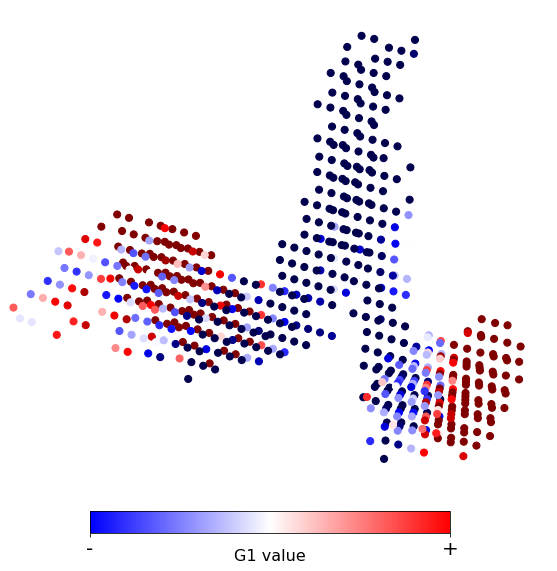

In [12]:
# Plot using 3D scatter plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.dist=6
ax.set_axis_off()

ax.scatter(
    G1_idx[:,0],
    G1_idx[:,1],
    G1_idx[:,2],
    s=50, alpha=1,
    cmap='seismic', vmin=-0.1, vmax=0.1, 
    c=G1_values
)

# Add legend    
norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)

cb_ax = fig.add_axes([0.25, 0.15, 0.5, 0.03]) # start x, start y, length x, height y
cb = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.bwr), ticks=[-1, 1],
                  cax=cb_ax, orientation='horizontal')
cb.set_label("G1 value", fontsize=16, labelpad=-10)
cb.ax.set_xticklabels(['-','+'], fontsize=20) 

plt.savefig('gradient_1.png', dpi=300, bbox_inches='tight')
plt.show()

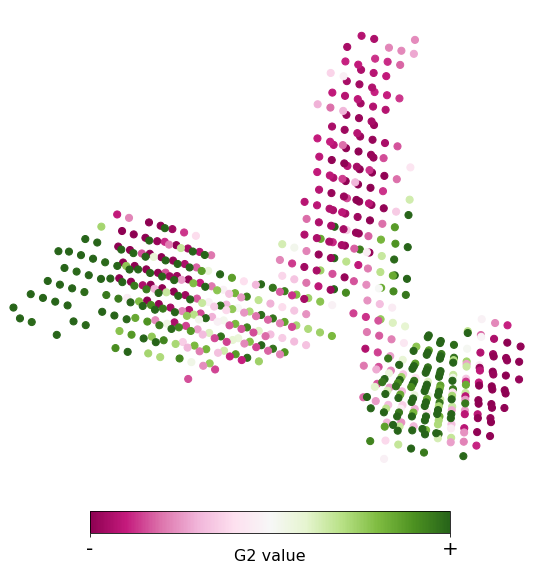

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.dist=6
ax.set_axis_off()

ax.scatter(
    G1_idx[:,0],
    G1_idx[:,1],
    G1_idx[:,2],
    s=50, alpha=1,
    cmap='PiYG', vmin=-0.1, vmax=0.1, 
    c=G2_values
)

# Add legend    
norm = matplotlib.colors.Normalize(vmin=-1, vmax=1)

cb_ax = fig.add_axes([0.25, 0.15, 0.5, 0.03]) # start x, start y, length x, height y
cb = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.PiYG), ticks=[-1, 1],
                  cax=cb_ax, orientation='horizontal')
cb.set_label("G2 value", fontsize=16, labelpad=-10)
cb.ax.set_xticklabels(['-','+'], fontsize=20) 

plt.savefig('gradient_2.png', dpi=150, bbox_inches='tight')
plt.show()